### Analyze the IRIS data set using KMeans clustering

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

In [2]:
# Iris dataset in scikit-learn
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
points = X

In [5]:
new_points = points

In [6]:
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)
# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


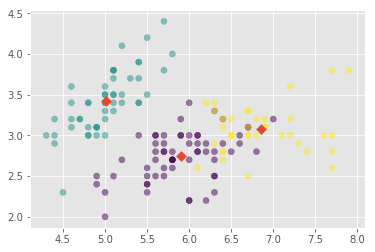

In [7]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,s=50,marker='D')
plt.show()


### Use the decrease of inertia to decide how many cluster to use:

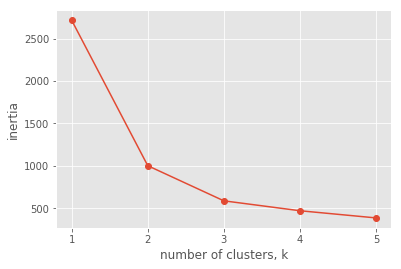

In [8]:
#https://archive.ics.uci.edu/ml/datasets/seeds
df = pd.read_csv("seeds.csv")
y = df.iloc[:,7].values
X = df.iloc[:,0:7].values
samples = X
varieties = y

from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [9]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0           1  60   0
1          59  10   2
2           9   0  68


In [10]:
# Clustering stocks using KMeans
# Import Normalizer
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
movements = df.iloc[1:,1:].values
companies = df.iloc[1:,0].values
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
0        0                                 AIG
2        0                    American express
4        0                     Bank of America
54       0                         Wells Fargo
57       0                               Xerox
25       0                      JPMorgan Chase
17       0                       Goldman Sachs
14       0                                Ford
15       0                   General Electrics
46       1                            Symantec
34       1                            Navistar
49       1  Taiwan Semiconductor Manufacturing
31       1                                  3M
50       1                   Texas instruments
22       1                                 IBM
52       1                       Valero Energy
43       1                        Schlumberger
56       1                               Exxon
12       1                   DuPont de Nemours
7        1                         Caterpillar
11       1   

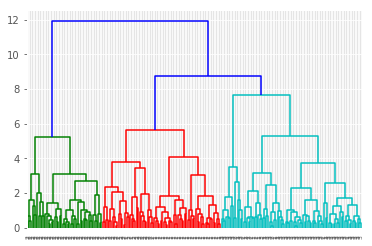

In [11]:
## Clustering Hierarchy
# Perform the necessary imports
df = pd.read_csv("seeds.csv")
y = df.iloc[:,7].values
X = df.iloc[:,0:7].values
samples = X
varieties = y
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

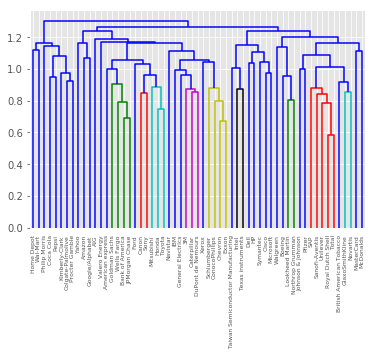

In [12]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()


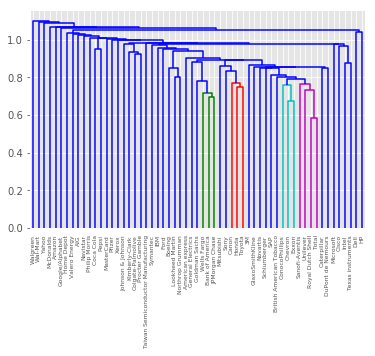

In [13]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='single')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()


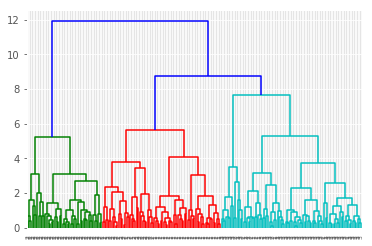

varieties   1   2   3
labels               
1           0  47   0
2          51  23   0
3           1   0  13
4          17   0  57


In [14]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

## Clustering Hierarchy
# Perform the necessary imports
df = pd.read_csv("seeds.csv")
y = df.iloc[:,7].values
X = df.iloc[:,0:7].values
samples = X
varieties = y
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


### TSNE

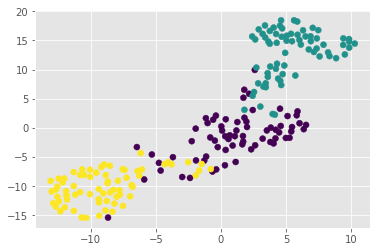

In [15]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=varieties)
plt.show()


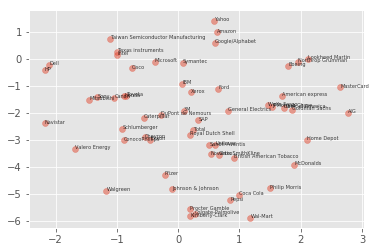

In [16]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


### PCA

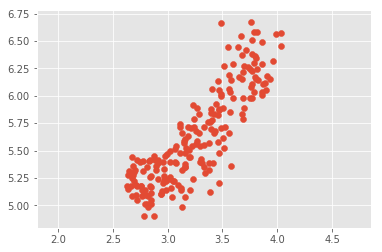

0.8604405325922295


In [17]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = pd.read_csv("seeds-width-vs-length.csv")
# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


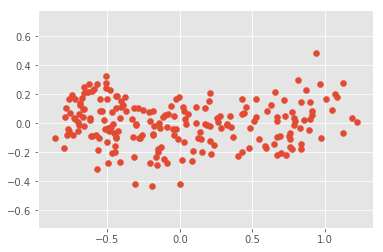

-4.984870467566551e-17


In [18]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

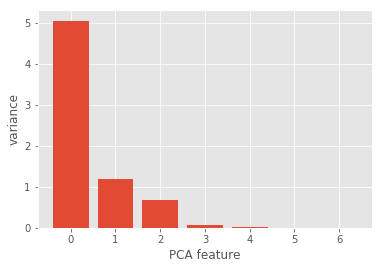

In [19]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [20]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)


(209, 2)


### tf-idf word freqeuncy array

In [21]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering wikipedia page

In [22]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)


In [40]:
titles = ['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Prednisone',
 'Fever',
 'Gabapentin',
 'Lymphoma',
 'Chad Kroeger',
 'Nate Ruess',
 'The Wanted',
 'Stevie Nicks',
 'Arctic Monkeys',
 'Black Sabbath',
 'Skrillex',
 'Red Hot Chili Peppers',
 'Sepsis',
 'Adam Levine']

In [56]:
df = pd.read_csv("wikipedia-vectors.csv")
articles = df.iloc[1:,1:].values.T

In [57]:
type(articles)

numpy.ndarray

In [58]:
articles.shape

(60, 13124)

In [60]:
# Import pandas
#Take a look at the cluster labels and see if you can identify any patterns!
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
29      0                               Jennifer Aniston
21      0                             Michael Fassbender
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
20      0                                 Angelina Jolie
38      1                                         Neymar
30      1                  France national football team
31      1                              Cristiano Ronaldo
32      1                                   Arsenal F.C.
33      1                                 Radamel Falcao
34      1                             Zlatan Ibrahimović
35      1                Colomb